In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.shape)

(891, 12)


In [5]:
y_train = df['Survived']
y_train.shape

(891,)

In [6]:
df.drop(['Survived'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

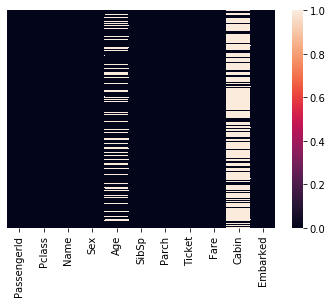

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True)

In [9]:
df[['Pclass','Age']].groupby(['Pclass'],as_index=False).mean().sort_values(['Age'],ascending=False)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [10]:
def replace_nan_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else: 
        return Age

In [11]:
df['Age'] = df[['Age','Pclass']].apply(replace_nan_age, axis=1)

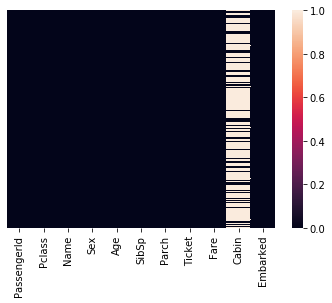

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [13]:
df.drop(columns='Cabin',axis=1,inplace=True)

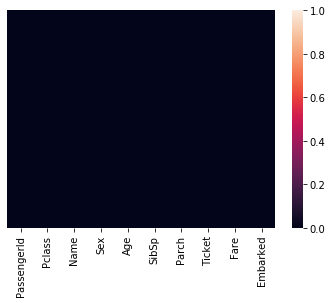

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [15]:
df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [16]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
df = pd.concat([df,Sex],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
Embarked=pd.get_dummies(df['Embarked'])
df=pd.concat([df,Embarked],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.3 KB


In [20]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,0,1


In [21]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
df_test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [23]:
Sex = pd.get_dummies(df_test['Sex'],drop_first=True)
df_test = pd.concat([df_test,Sex],axis=1)
df_test.drop(['Sex'],axis=1,inplace=True)

In [24]:
Embarked=pd.get_dummies(df_test['Embarked'])
df_test=pd.concat([df_test,Embarked],axis=1)
df_test.drop(['Embarked'],axis=1,inplace=True)

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.3 KB


In [26]:
df_test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,0.023245,-0.027419,-0.035731,0.048008
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.108615,-0.318543,0.252608,0.120783
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,0.000013,0.180601,-0.017956,-0.158295
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,-0.159120,-0.005791,-0.132948,0.092201
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,-0.191514,0.312161,-0.155562,-0.178582
male,0.023245,0.108615,0.000013,-0.099943,-0.159120,-0.191514,1.000000,-0.033684,-0.115574,0.105883
C,-0.027419,-0.318543,0.180601,-0.016365,-0.005791,0.312161,-0.033684,1.000000,-0.199786,-0.767375
Q,-0.035731,0.252608,-0.017956,-0.098824,-0.132948,-0.155562,-0.115574,-0.199786,1.000000,-0.474962
S,0.048008,0.120783,-0.158295,0.079367,0.092201,-0.178582,0.105883,-0.767375,-0.474962,1.000000


In [27]:
df_test[['Pclass','Age']].groupby(['Pclass'],as_index=False).mean().sort_values(['Age'],ascending=False)

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [28]:
df[['male','Age']].groupby(['male'],as_index=False).mean().sort_values(['Age'],ascending=False)

,male,Age
1,1,30.047088
0,0,27.828025


In [29]:
def replace_nan_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age

In [30]:
df_test['Age'] = df_test[['Age','Pclass']].apply(replace_nan_age, axis=1)

In [31]:
df_test.replace(np.nan,df_test['Fare'].mean(),inplace=True)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.3 KB


In [33]:
print(df.shape)
print(df_test.shape)

(891, 10)
(418, 10)


In [34]:
x_trn,x_valid,y_trn,y_valid=train_test_split(df,y_train,test_size=0.33,random_state=150)

In [35]:
model=XGBClassifier(n_estimators=500, max_depth=3,learning_rate=0.5)
model.fit(df,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
model.score(x_valid,y_valid)

1.0

In [37]:
predict_y = model.predict(df_test)

In [38]:
model.score(x_trn,y_trn)

1.0

In [41]:
my_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predict_y })
my_submission.to_csv('submission.csv', index=False)